# Python CT图像预处理——nii格式读取、重采样、窗宽窗位设置
[参考资料](https://blog.csdn.net/lavinia_chen007/article/details/125389503)

# 读取

In [2]:
import numpy as np
import nibabel as nib
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
# 魔法函数
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# 使用 nibabel 库 读取图像
image_path ="C:\\Users\\14137\\Desktop\\sci\\kechuang\\CM-CH\\images\\002.nii.gz"
image_obj = nib.load(image_path)
# print(f'Type of the image {type(image_obj)}')

# 使用 get_fdata()方法从 image_obj中提取 data
image_data = image_obj.get_fdata()
# type(image_data)

# 查看图像大小
height, width, depth = image_data.shape
# print(f"The image object height: {height}, width:{width}, depth:{depth}")

# 其中，最感兴趣的是图像的分辨率 在 pixdim 里面 单位mm
pixdim =  image_obj.header['pixdim']
# print(f'z轴分辨率： {pixdim[3]}')
# print(f'in plane 分辨率： {pixdim[1]} * {pixdim[2]}')

# 重采样
图像数据的重采样是指将原始图像数据重新采样到不同分辨率或尺寸的过程。这种操作可以用于调整图像的大小，改变图像的比例，或者适应特定的需求或限制。重采样通常涉及插值技术，即根据已知像素值来估计新像素值，以使图像在新尺寸或分辨率下保持合理的视觉质量。

常见的重采样方法包括最近邻插值、双线性插值和双三次插值等。最近邻插值简单快速，但可能导致图像锯齿化；双线性插值在保持图像光滑性的同时速度较快；双三次插值在保留图像细节的同时可能会增加计算量。

重采样在图像处理和计算机视觉中经常用于图像放缩、裁剪、旋转和图像增强等操作。

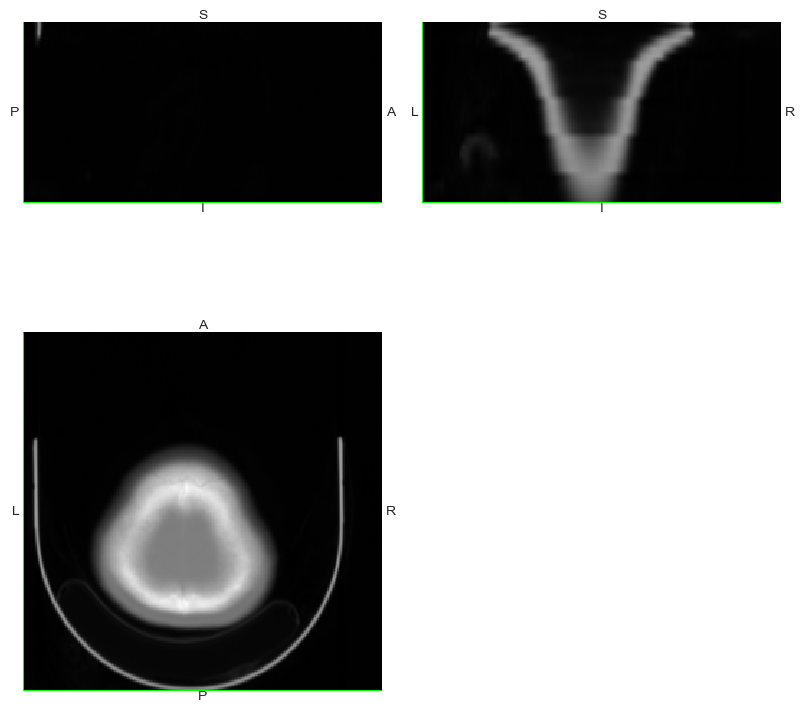

In [9]:
import skimage
from nibabel.viewers import OrthoSlicer3D

# 原始空间信息
ori_space = [height, width, depth]

# Resample to have 1.0 spacing in all axes
spacing = [1.0, 1.0, 1.0]

#利用双线性插值对图像数据进行重采样操作，以实现在所有轴向上具有相同间距的图像数据

def resample(data,ori_space, header, spacing):
    # 计算新的空间信息
    new_width = round(ori_space[0] * pixdim[1] / spacing[0])
    new_height = round(ori_space[1] * pixdim[2] / spacing[1])
    new_channel = round(ori_space[2] * pixdim[3] / spacing[2])
    new_space = [new_width, new_height, new_channel]

    data_resampled = skimage.transform.resize(data,new_space,order=1, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=True, anti_aliasing_sigma=None)
    return data_resampled

data_resampled = resample(image_data, ori_space, image_obj.header, spacing)
OrthoSlicer3D(data_resampled).show()
